<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-2/blob/main/ImagenATexto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytesseract

In [1]:
import pytesseract
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from collections import namedtuple

In [2]:
!unzip Prueba.zip

Archive:  Prueba.zip
  inflating: pagina1.jpg             
  inflating: 26119A00100021_page-0002.jpg  


In [2]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.figure(figsize = (180,18))
        plt.imshow(img2,)
        
        plt.show()
    else:
        img2 = image
        plt.figure(figsize = (180,18))
        plt.imshow(img2,cmap='gray',shape=600)
        
        plt.show()

In [3]:
imagen=cv2.imread("pagina1.jpg")

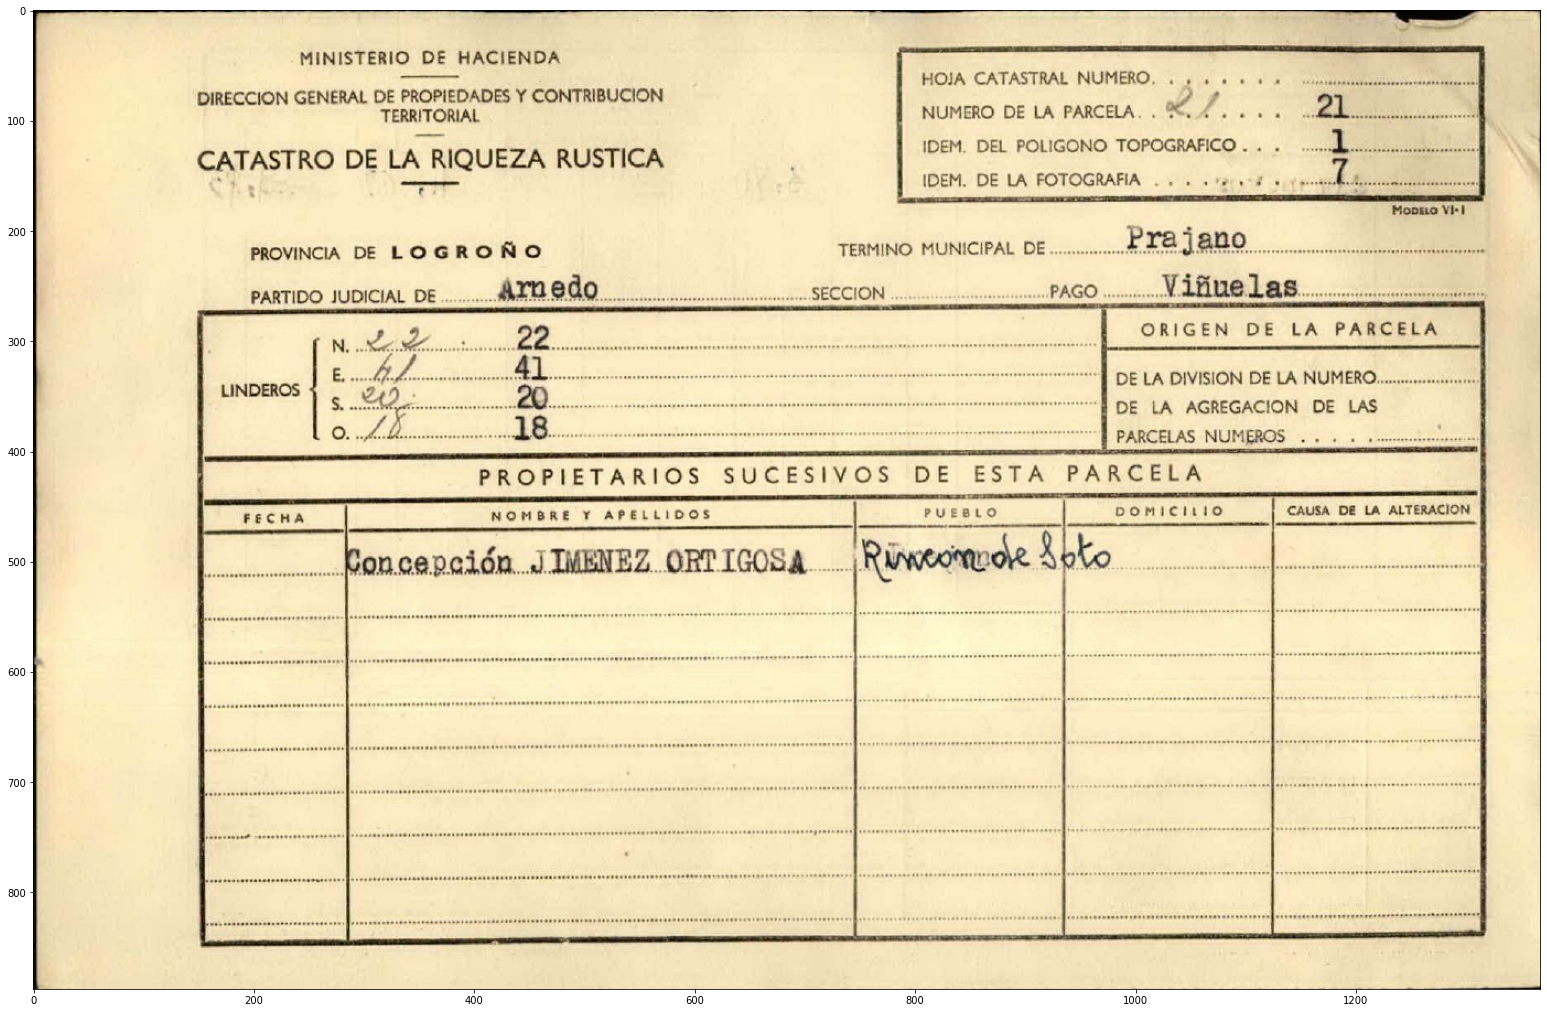

In [5]:
mostrarImagen(imagen)

In [4]:
OCRLocation = namedtuple ( "OCRLocation" , [ "id" , "bbox" ])

In [5]:
OCR_Locations=[
    OCRLocation("termino_municipal",(940,185,310,40)),
    OCRLocation("partido_judicial",(380,225,300,45))
    ]

In [8]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [6]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [12]:
text2=pytesseract.image_to_string(imagen)
text2

' \n\nMINISTERIO DE HACIENDA\nHOJA CATASTRAL NUMERO.\n\n \n\nNUMERO DE LA PARCELA. . of heowee\n\nDIRECCION GENERAL DE PROPIEDADES Y CONTRIBUCION\n\n \n\nTERRITORIAL\nCATASTRO DE LA RIQUEZA RUSTICA , IDEM. DEL POLIGONO TOPOGRAFICO.. .\nShe —— IDEM, DE LA FOTOGRAFIA . «5 5 tae nod oy peeeten\n= Mopmo Viel\n\n7\n\n \n\n  \n\nPROVINCIA DE LOGRONO rajan\nVifiue las...\n\nPARTIDO JUDICIAL DE Arnedo.. : SECCION PAGO ;\nicra ie ORIGEN DE LA PARCELA\n\nunperos 4 ©" " DE LA DIVISION DE LA NUMERO.\n. : ria ~~~ DE LA AGREGACION DE LAS\na : 5 PARCELAS NUMEROS ... . .\n\nTERMINO MUNICIPAL DE........\n\n              \n   \n\nCAUSA DE LA ALTERACION\n\nNOMBRE Y APELLIDOS\n\nRoncepcidn..JIMENEZ ORTIGOSA\n\n \n\x0c'

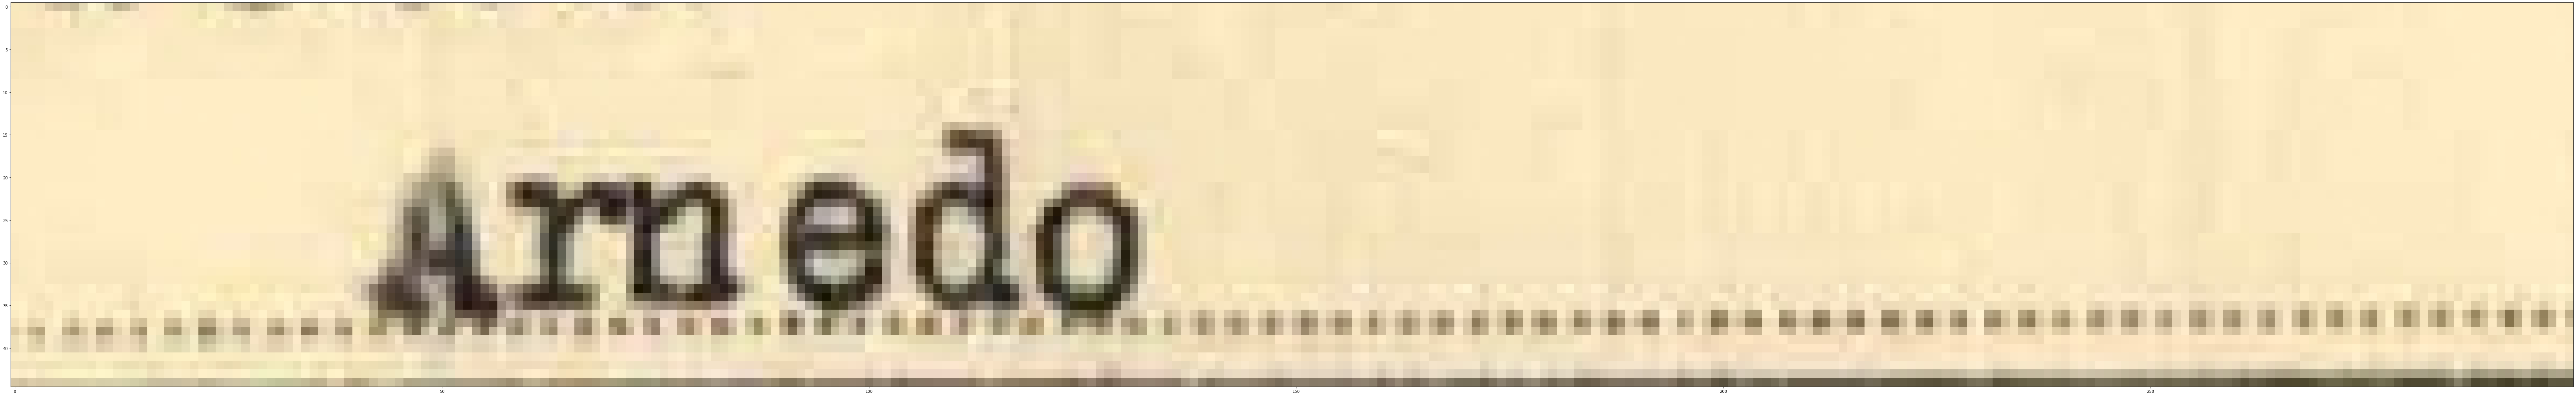

In [11]:
(x,y,w,h)=OCR_Locations[1].bbox
roi=imagen[y:y + h, x:x + w]
mostrarImagen(roi)

In [10]:
print(pytesseract.image_to_string(roi))

In [17]:
parsingResults=[]
for loc in OCR_Locations:
  (x,y,w,h)=loc.bbox
  roi=imagen[y:y + h, x:x + w]

  rgb=cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
  text=pytesseract.image_to_string(rgb)
  print(text)

  for line in text.split("\n"):
    if(len(line))==0:
      continue
    
    lower=line.lower()
    count = 0

    if count==0:
      parsingResults.append((loc,line))

In [18]:
results={}

for(loc,line) in parsingResults:
  r=results.get(loc.id,None)

  if r is None:
    results[loc.id]=(line,loc._asdict())
  else:
    (existingText,loc)=r
    text="{}\n".format(existingText,line)

    results[loc["id"]]=(text,loc)

In [12]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [19]:
for (locID,result) in results.items():
  (text,loc)=result
  print(loc["id"])
  print("=" * len(loc["id"]))
  print("{}\n\n".format(text))
  (x,y,w,h)=loc["bbox"]
  clean=cleanup_text(text)
  cv2.rectangle(imagen,(x,y),(x+w,y+h),(0,255,0,2))
  for (i,line) in enumerate(text.split("\n")):
    startY=y+(i*70)+40
    cv2.putText(imagen,line,(x,startY),cv2.FONT_HERSHEY_SIMPLEX,1.8,(0,0,255),2) 

termino_municipal
 



partido_judicial
 






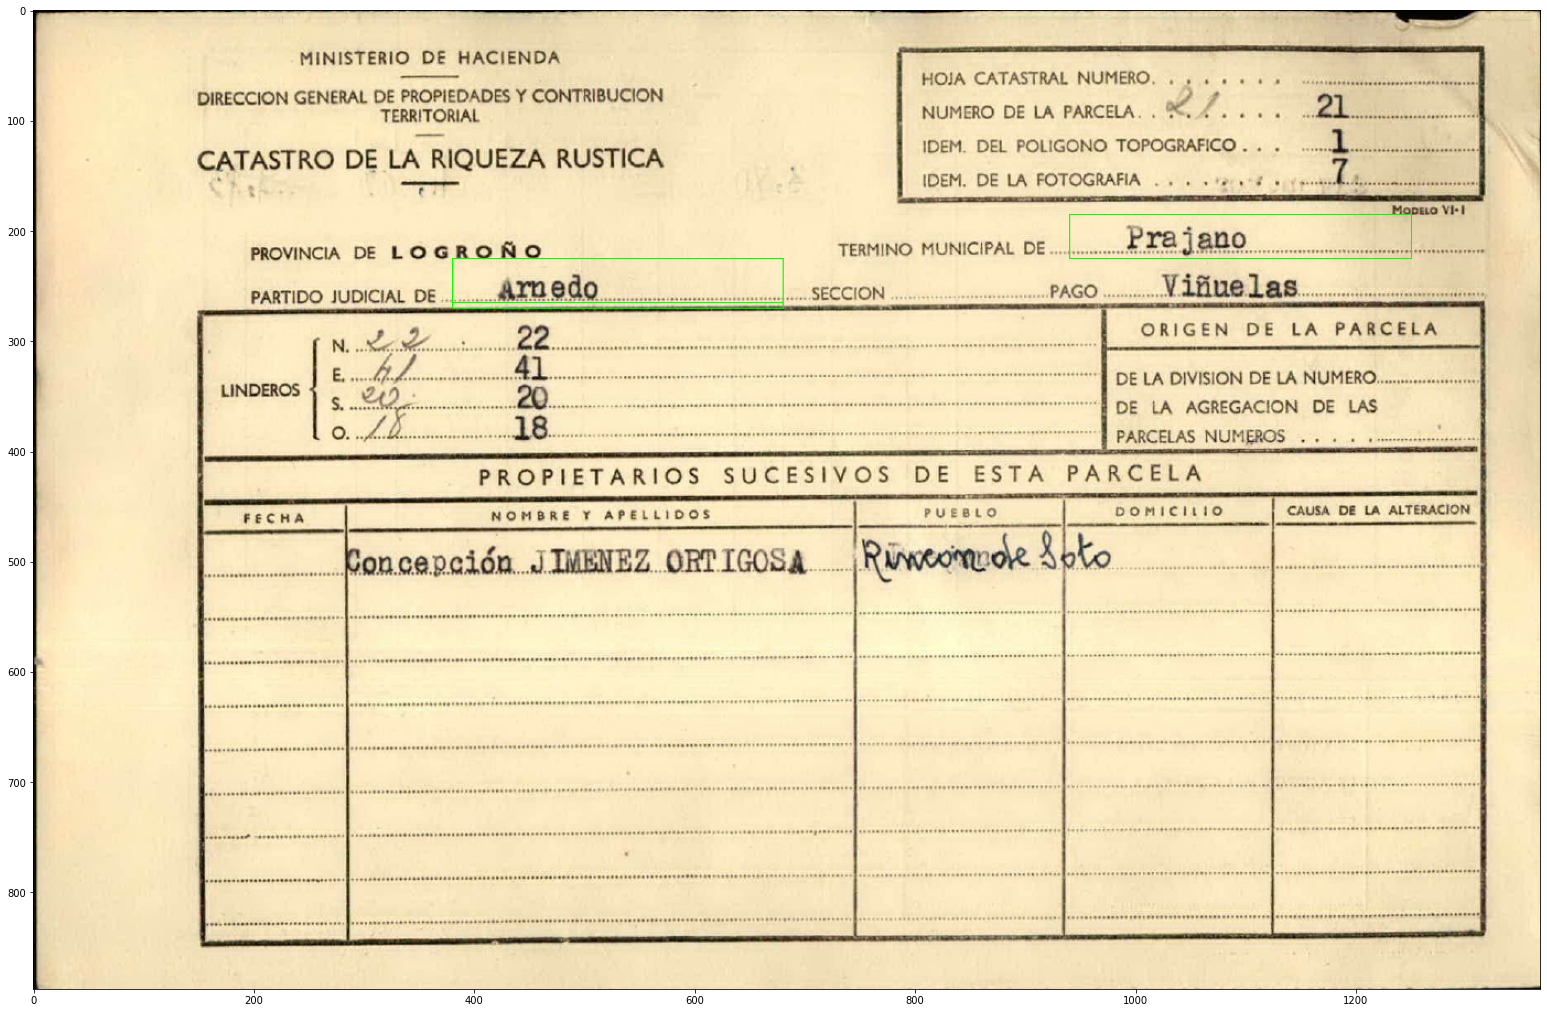

In [20]:
mostrarImagen(imagen)